In [1]:
from __future__ import division
import numpy as np
import math
from math import *
import scipy as sp
import scipy.stats as ss
from scipy.stats import norm
import time
from sklearn import linear_model
from scipy import linalg
import random
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
nums = [1,2,3,4,6,6,7,7,7,7,8,8,8,8,9]
print(round(np.mean(nums),2))
print(np.median(nums))
print(sp.stats.mode(nums)[0][0])

6.07
7.0
7


In [3]:
'''
The ratio of boys to girls for babies born in Russia is 1.09. 
If there is 1 child born per birth, what proportion of Russian 
families with exactly 6 children will have at least 3 boys?
'''
ratio = 1.09
p = ratio / (ratio+1)
n = 6

In [4]:
def fact(n):
    return 1 if n==0 else n*fact(n-1)

def comb(n,r):
    return fact(n)/(fact(r)*fact(n-r))

def b(n,r,p):
    return comb(n,r) * p**r * (1-p)**(n-r)

'''
Note that summation over all possible r's is 1.
prob = sum([b(n,r,p) for r in [0,1,2,3,4,5,6]])
prob = 1
'''
prob = sum([b(n,r,p) for r in [3,4,5,6]])
print(round(prob, 3))

0.696


In [7]:
"""
Note that np.random.binomial(n, p, sz) returns number of successes.
"""
def binomial_simul(r, n, p, sz):
    return np.mean(np.random.binomial(n, p, sz)==r)

sz = 200000 # smaller sz less accurate
prob = sum([binomial_simul(r, n, p, sz) for r in [3,4,5,6]])
print(round(prob, 3))

0.692


In [8]:
"""
In a game 236 dice toss with p as prob of getting 6.
"""
n, p = 235, 1/6

"""
the more we increse sample size, the more we see the tail of the distro.
"""
sample_size = 10000
print(sorted(Counter(np.random.binomial(n, p, sample_size)).items(), key=lambda tpl: tpl[1], reverse=True))

# Equal if sample_size is infinity:
print(np.mean(np.random.binomial(n, p, sample_size) == 51))
print(b(n, 51, p))

print("")

print(sum([np.mean(np.random.binomial(n, p, sample_size)==r) for r in range(51, n+1)]))
print(sum([b(n, r, p) for r in range(51, n+1)]))

[(39, 709), (38, 704), (40, 662), (37, 655), (41, 635), (36, 631), (42, 600), (35, 566), (43, 555), (44, 492), (34, 467), (33, 404), (45, 396), (46, 327), (32, 321), (31, 288), (47, 267), (48, 199), (30, 187), (49, 157), (29, 127), (50, 120), (28, 98), (51, 84), (27, 71), (26, 47), (52, 45), (53, 41), (54, 34), (25, 28), (24, 19), (55, 13), (56, 12), (23, 9), (57, 8), (58, 5), (59, 5), (21, 4), (22, 4), (20, 2), (60, 1), (62, 1)]
0.0071
0.008566903317549073

0.0274
0.026544245711691068


In [9]:
'''
The probability that a machine produces a defective product is 1/3. 
What is the probability that the defect is found during 
the first 5 inspections?
'''
p = 1/3

def geom(n,p):
    return p * (1-p)**(n-1)
    
sum([geom(n,p) for n in [1,2,3,4,5]])
"""
defect in 1st inspection + defect in 2nd inspection + ... + defect in 5th inspection.
what does "defect is found in i-th inspection mean"? first i-1 healthy.
"""

'\ndefect in 1st inspection + defect in 2nd inspection + ... + defect in 5th inspection.\nwhat does "defect is found in i-th inspection mean"? first i-1 healthy.\n'

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [10]:
mu = 20
s = 2

x1 = 19.5
x2, x3 = 20, 22

math.erf((x1-mu)/s) + 0.5

0.2236736098317631

In [17]:
def standard_normal(x):
    const = 1/sqrt(2*pi)
    return const * exp(-0.5*x**2)

def normal_pdf(x,mu,s):
    return (1/s) * standard_normal((x-mu)/s)

def normal_cdf(x,mu,s):
    arg = (x-mu)/(s*sqrt(2))
    return 0.5*(1+erf(arg))

def normal_cdf1(x,mu,s):
    return c(x, loc=mu, scale=s)

def poisson_pdf(k,lmbd):
    return lmbd**k*exp(-lmbd)/fact(k)


In [21]:
print(normal_cdf(5, 4, 1))
print(normal_cdf1(5, 4, 1))
print("")
print(ss.norm.cdf(5))
print(normal_cdf1(5, 0, 1))

0.841344746068543
0.8413447460685429

0.9999997133484281
0.9999997133484281


In [56]:
'''
A large elevator can transport a maximum of 9800 pounds. 
Suppose a load of cargo containing 49 boxes must be 
transported via the elevator. 
The box weight of this type of cargo follows a 
distribution with a mean of 205 pounds and a standard deviation 
of 15 pounds. Based on this information, what is the 
probability that all 49 boxes can be safely loaded into the 
freight elevator and transported?
'''

# population mean and std = 205, 15

# sampling distribution std:
standard_error = 15/sqrt(49)

# 9800/49 = 200 capacity of elevator for each box.
z_score = (200-205)/standard_error
prob = norm.cdf(z_score)
prob, z_score

(0.009815328628645334, -2.3333333333333335)

In [141]:
'''
The number of tickets purchased by each student for the University X vs. 
University Y football game follows a distribution that has 
a mean of 2.4 and a standard deviation of 2.

A few hours before the game starts, 100 eager students line up to 
purchase last-minute tickets. If there are only 250 tickets left, 
what is the probability that all students will be able to purchase tickets?
'''
# meaning what is the probability that every student buys 2.5 tickets?

standard_error = 2/sqrt(100)

z_score = (2.5-2.4)/standard_error
prob = norm.cdf(z_score)
prob

0.69146246127401323

In [53]:
# z-score based on probability
print(norm.ppf(0.975))

# probablity based on z-score
print(norm.cdf(1.9599))

# z-score range:
print(norm.ppf(0.0001), norm.ppf(0.9999))

print(norm.pdf(0))

1.959963984540054
0.9749962601845973
-3.7190164854556804 3.719016485455709
0.3989422804014327


In [73]:
"""
what is z-critical value for alpha-level of 0.05, 0.01, 0.001 in one-tail distro?
"""
print(norm.ppf(0.95), norm.ppf(0.99), norm.ppf(0.999), norm.ppf(0.5))

"""
what is z-critical value for alpha-level of 0.05, 0.01, 0.001 in two-tail distro?
"""
print(norm.ppf(0.025), norm.ppf(0.975)) 
print(norm.ppf(0.005), norm.ppf(0.995)) 
print(norm.ppf(0.0005), norm.ppf(0.9995))


1.6448536269514722 2.3263478740408408 3.090232306167813 0.0
-1.9599639845400545 1.959963984540054
-2.575829303548901 2.5758293035489004
-3.2905267314918945 3.2905267314919255


In [30]:
# n = int(raw_input())
# x = map(float, raw_input().split())
# y = map(float, raw_input().split())

def std(x):
    n = len(x)
    mu_x = sum(x)/n
    return sqrt((1/n)*sum([(item-mu_x)**2 for item in x]))

def cov(x,y): # good
    n = len(x)
    mu_x = sum(x)/n
    mu_y = sum(y)/n
    return (1/n)*sum([(x[i]-mu_x)*(y[i]-mu_y) for i in range(n)])

def corr_coeff(x,y): # good
    std_x = std(x)
    std_y = std(y)
    cov_xy = cov(x,y)
    return cov_xy / (std_x*std_y)

def normalize(x):
    mu_x = sum(x)/len(x)
    std_x = std(x)
    return [(item-mu_x)/std_x for item in x]

def corr_coeff1(x,y):
    n = len(x)
    return (1/n)*sum([normalize(x)[i]*normalize(y)[i] for i in range(n)])

def corr_coeff2(x,y):
    n = len(x)
    return cov(normalize(x), normalize(y))

def linreg(x,y):
    n = len(x)
    mu_x = sum(x)/n
    mu_y = sum(y)/n
    r = corr_coeff(x,y)
    slope = r * (std(y)/std(x))
    intercept = mu_y - slope*mu_x
    return slope, intercept

def linreg1(x,y): # good
    # m = cov(x,y) / var(x)
    n = len(x)
    mu_x = sum(x)/n
    mu_y = sum(y)/n
    slope = sum([(x[i]-mu_x)*(y[i]-mu_y) for i in range(n)])/sum([(x[i]-mu_x)**2 for i in range(n)])
    intercept = mu_y-slope*mu_x
    return slope, intercept
    

def linreg_pred(x,y,x0):
    slope, intercept = linreg(x,y)
    return slope*x0+intercept
    

In [32]:
x = [95,85,80,70,60]
y = [85,95,70,65,70]
x0 = 80
print(round(linreg_pred(x,y,x0),4))

x1 = np.array(x).reshape(-1, 1)
lm = linear_model.LinearRegression()
lm.fit(x1,y)
print('%0.4f' %(lm.intercept_ + x0*lm.coef_[0]))


78.2877
78.2877


In [34]:
normalize(x), (x - np.mean(x)) / np.std(x)

([1.4069300106240255,
  0.5793241220216575,
  0.1655211777204736,
  -0.6620847108818944,
  -1.4896905994842622],
 array([ 1.40693001,  0.57932412,  0.16552118, -0.66208471, -1.4896906 ]))

In [25]:
def argsort(alist):
    return [i for (i,v) in sorted(enumerate(alist), key=lambda x:x[1])]

def argsort1(alist):
    return [i for (v,i) in sorted((v,i) for (i,v) in enumerate(alist))]

def argsort2(alist):
    return sorted(range(len(alist)), key=alist.__getitem__)

def getrank(alist):
    n = len(alist)
    arg_sort = argsort(alist)
    tmp = range(n)
    ranks = [0 for i in range(n)]
    for i,v in enumerate(arg_sort):
        ranks[v] = tmp[i] 
    return ranks

def getrank1(alist):
    return np.array(alist).argsort().argsort()

#if no duplicates in each array
def spearman(x,y):
    rank_x = getrank1(x)
    rank_y = getrank1(y)
    return corr_coeff(rank_x, rank_y)

#if no duplicates in each array
def spearman1(x,y):
    n = len(x)
    rank_x = getrank(x)
    rank_y = getrank(y)
    sum_di = sum([(rank_x[i]-rank_y[i])**2 for i in range(n)])
    return 1-(6*sum_di)/(n*(n**2-1))

In [36]:
# spearman rank correlation
X = [10, 9.8, 8, 7.8, 7.7, 1.7, 6, 5, 1.4, 2]
Y = [200, 44, 32, 24, 22, 17, 15, 12, 8, 4]
print spearman(X,Y)
print spearman1(X,Y)
print corr_coeff(X,Y)
print corr_coeff1(X,Y)


0.90303030303
0.90303030303
0.579137124754
0.579137124754


In [37]:
x = [0,1,2,3,4,5,6,7]
y = [5,7,9,14,17,16,18,19]
spearman(x,y)

0.97619047619047616

In [82]:
a = [5,4,2,6,1]
print argsort1(a)
print argsort2(a)
print argsort3(a)
print getrank(a)

[4, 2, 1, 0, 3]
[4, 2, 1, 0, 3]
[4, 2, 1, 0, 3]
[3, 2, 1, 4, 0]


In [36]:
np.array([10, 9.8, 8, 7.8, 7.7, 1.7, 6, 5, 1.4, 2]).argsort()

array([8, 5, 9, 7, 6, 4, 3, 2, 1, 0])

In [96]:
# more efficient for larger arrays
def getrank_arr(a):
    n = len(a)
    tmp = a.argsort()
    ranks = np.zeros(n,int)
    ranks[tmp] = np.arange(n)
    return ranks

def getrank_arr1(a):
    return a.argsort().argsort()

In [95]:
# comparaing the efficiency
A = np.random.randint(10,size=100000)

t0 = time.clock()
print getrank_arr(A)
print time.clock()-t0

t0 = time.clock()        
print getrank_arr1(A)
print time.clock()-t0


[17723 48958 70265 ..., 26851 81931 99999]
0.006197
[17723 48958 70265 ..., 26851 81931 99999]
0.011825


In [49]:
x1 = [5,6,7,8,9]
x2 = [7,6,4,5,6]
y = [10,20,60,40,50]

X = np.vstack([np.ones(len(x1)),x1,x2]).T
xtx = linalg.inv(np.dot(X.T,X))
xty = np.dot(X.T,y)
B = np.dot(xtx,xty)
B

array([ 51.95348837,   6.65116279, -11.1627907 ])

In [51]:
lm = linear_model.LinearRegression()
X = np.vstack([x1,x2]).T # also [[x1[i],x2[i]] for i in range(len(x1))]
lm.fit(np.vstack([x1,x2]).T , y)
a = lm.intercept_
b = lm.coef_
print(a, b[0], b[1])

51.953488372093 6.651162790697679 -11.16279069767442


In [62]:
n = len(y)
X = np.vstack([[1]*n, x1, x2]).T
theta = np.dot(linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
theta

array([ 51.95348837,   6.65116279, -11.1627907 ])

# Random Sampling

In [52]:
random.randint(-10,5)

-7

In [14]:
a = [1,3,5,76,78]
random.shuffle(a), a

(None, [78, 3, 76, 1, 5])

In [46]:
print(random.sample([0,0.4,0.8,-2,10],3))
print(random.sample(range(1000000000),3)) # range is unbelivably slow here

[0.8, 0, 10]
[821564686, 643658096, 301647229]


In [3]:
random.random() # returns one probability value uniformly

0.6509292153530621

In [41]:
random.uniform(1,5) # unifrom between a,b or b,a 

3.948880314420075

In [10]:
random.gauss(1,0.2)

1.1046486505124087

In [41]:
a = [1,3,4,6]
random.sample(a,3)

[4, 1, 3]

In [67]:
np.random.rand(3,4,2)

array([[[0.02461652, 0.18502196],
        [0.62149951, 0.45357838],
        [0.66735432, 0.05616568],
        [0.62872229, 0.83133142]],

       [[0.55235425, 0.87528566],
        [0.11582458, 0.63515973],
        [0.81343093, 0.18875074],
        [0.77301486, 0.74150095]],

       [[0.37837334, 0.03964454],
        [0.13569453, 0.40557164],
        [0.2750892 , 0.24152879],
        [0.10367275, 0.70195836]]])

In [68]:
m = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.prod(m,axis=0)

array([ 28,  80, 162])

In [43]:
n = 10
index = random.sample(range(n), 1)
index

[4]

In [76]:
# Split a dataset into a train and test set
def train_test_split(dataset, split=0.60):
    n = len(dataset)
    train = list()
    train_size = split * n
    dataset_copy = list(dataset)
    while len(train) < train_size:
        #index = random.randrange(len(dataset_copy))
        index = random.sample(range(n), 1)

        train.append(dataset_copy.pop(index))
    return train, dataset_copy
 
# test train/test split
random.seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
train, test = train_test_split(dataset)
print(train)
print(test)

IndexError: pop index out of range

In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = len(dataset) / folds
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# test cross validation split
random.seed(1)
dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 4)
print(folds)

In [64]:
def jack_knife(arr):
    arr_copy = []
    estimates = []
    for index in range(len(arr)):
        if arr:
            arr.pop()
            estimates.append(np.var(arr))
            arr = arr_copy
        else:
            return np.var(estimates)
    return np.var(estimates)    
        
arr = [0,2,5,6,-3,-2]
jack_knife(arr)
        
    

0.0

### Resampling

In [58]:
# sampling with replacement
np.random.choice([1,3,4,6], 2, replace=True) #default is True

array([4, 4])

In [60]:
# sampling with replacement
np.random.choice([1,3,4,6], 5)

array([1, 4, 4, 3, 6])

In [61]:
# sampling with replacement
np.random.choice([1,3,4,6], 3, replace=False)

array([6, 1, 3])

In [56]:
np.random.seed(123)

In [153]:
for k,v in Counter(np.random.choice([3,4,5,6],12)).iteritems():
    print k,'-->',v,'....',

3 --> 3 .... 4 --> 2 .... 5 --> 3 .... 6 --> 4 ....


In [112]:
arr = [1,3,5,7]
try:
    np.random.choice(arr,6,replace=False)
except ValueError, e:
    print e

Cannot take a larger sample than population when 'replace=False'


In [144]:
x = np.random.choice([0,1,2,3,4],(4,5))
x.ravel()

array([0, 0, 2, 1, 2, 1, 2, 3, 0, 3, 1, 1, 4, 0, 0, 1, 4, 0, 0, 3])

In [145]:
ind = np.random.choice(x.shape[1],3)
x[:,ind]

array([[2, 2, 0],
       [3, 3, 2],
       [4, 0, 1],
       [0, 3, 4]])

In [146]:
np.random.shuffle(x) # shuffles rows in place
np.random.shuffle(x.T) # shuffles columns in place
np.random.permutation(x) # returns a copy, does not change original

array([[4, 1, 0, 1, 0],
       [2, 0, 2, 0, 1],
       [3, 1, 3, 2, 0],
       [0, 1, 3, 4, 0]])

In [149]:
x = np.random.randint(0,5,(2,4))
y = np.random.randn(3,4)
np.concatenate([x,y])

array([[ 2.        ,  4.        ,  0.        ,  4.        ],
       [ 1.        ,  3.        ,  2.        ,  0.        ],
       [ 0.93152961,  0.3850661 ,  0.94587698,  0.61306773],
       [ 0.67364893,  1.49245539,  0.98647402,  0.99380671],
       [ 0.02041876, -0.58185021, -0.65956009,  0.7509446 ]])

In [176]:
# function equivalent to np.var(x,ddof=1)
def var(x):
    mu = np.mean(x)
    return sum([(item-mu)**2 for item in x])/(len(x)-1)

In [188]:
np.var(np.random.randint(0,6,(10,5)), ddof=1, axis=0) # 1*5

array([ 4.17777778,  2.48888889,  2.1       ,  1.87777778,  1.73333333])

In [79]:
def bootstrap(x, reps):
    n = len(x)
    xb = np.random.choice(x, (n,reps))
    mb = np.mean(xb, axis=0)
    vb = np.var(xb, ddof=1, axis=0) 
    return np.var(mb, ddof=1), np.var(vb, ddof=1)

#mb.sort()
#np.percentile(mb, [2.5, 97.5])

x = range(10)
reps = 10000
bootstrap(x, reps)    

(0.8328980097009702, 6.794792031537721)

In [77]:
x = range(5)
n = len(x)
reps = 10
xb = np.random.choice(x, (n, reps))
mb = np.mean(xb, axis=0)
vb = np.var(xb, ddof=1, axis=0) 

array([2.3, 2.3, 1.2, 1.3, 1.3, 2.8, 2.8, 1.3, 1.7, 2.8])

In [268]:
# outputs a list of n means for each item removed once
def jackknife(x,func):
    n = len(x)
    idx = np.arange(n)
    return [func(x[idx!=i]) for i in range(n)]

x = np.random.randint(0,10,6)
print jackknife(x,np.mean)  
print np.mean(jackknife(x,np.mean)) # jackknife mean estimate
print np.mean(x)

[3.0, 2.2000000000000002, 2.6000000000000001, 3.0, 3.3999999999999999, 2.7999999999999998]
2.83333333333
2.83333333333


In [270]:
def jackknife_var(x):
    n = len(x)
    means = jackknife(x,np.mean) # list of means
    mu = np.mean(means) # jackknife mean estimate
    return ((n-1)/n)*np.sum([(item-mu)**2 for item in means])

print jackknife_var(x)

0.694444444444


In [280]:
p = 0.56
n = 1000
se = sqrt((p*(1-p))/n)
z_star = norm.isf(0.025)
CI = p+np.array([-1,1])*se*z_star
CI

array([ 0.52923418,  0.59076582])

In [275]:
norm.isf(0.025)

1.9599639845400545

# Functions of random variable

(array([10136.,  9976.,  9976.,  9998., 10056.,  9954.,  9946., 10017.,
         9991.,  9950.]),
 array([6.29526985e-06, 1.00005587e-01, 2.00004878e-01, 3.00004169e-01,
        4.00003461e-01, 5.00002752e-01, 6.00002043e-01, 7.00001335e-01,
        8.00000626e-01, 8.99999917e-01, 9.99999208e-01]),
 <a list of 10 Patch objects>)

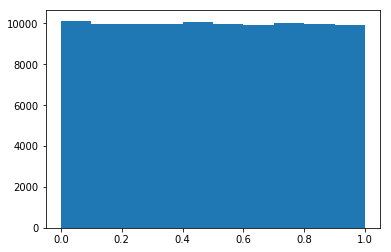

In [68]:
X = np.random.uniform(0,1, 100000)
plt.hist(X)

(array([31690., 13186., 10020.,  8540.,  7342.,  6723.,  6237.,  5801.,
         5290.,  5171.]),
 array([3.96304224e-11, 9.99998417e-02, 1.99999683e-01, 2.99999525e-01,
        3.99999367e-01, 4.99999208e-01, 5.99999050e-01, 6.99998892e-01,
        7.99998734e-01, 8.99998575e-01, 9.99998417e-01]),
 <a list of 10 Patch objects>)

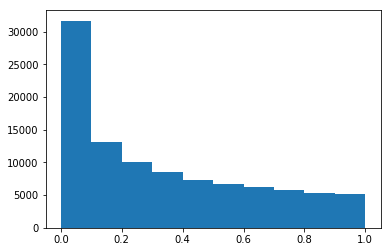

In [72]:
Y = X**2
plt.hist(Y)


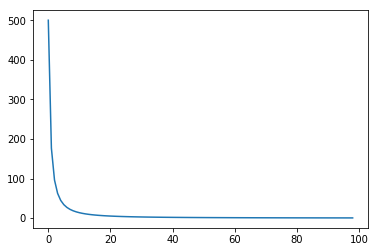

In [75]:
u =  np.arange(0.01,1,0.01)
fy = 0.5 * (u**(-1.5))
plt.plot(fy)

In [82]:
random.sample([1,3,4], 1)

[4]